In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import scipy.stats as stats
import numpy.random as random
import scipy.interpolate as interpol
import scipy.integrate as integrate
from scipy.special import comb,factorial


In [5]:
prior=1#this is a uniform prior

def poll(n,m,Range):#this is the function we need
    
    #calculate the posterior and plot it
    p=np.linspace(0.,1.,501)
    likelihood=comb(n,m)*p**m*(1-p)**(n-m)
    interp_f=interpol.interp1d(p,likelihood*prior,kind='cubic')
    norm=integrate.quad(interp_f,0,1)[0]
    posterior=likelihood*prior/norm
    plt.plot(p,posterior)
    
    #then calculate the probability within a range of the percentage who
    #favored the candidate in the interviews
    prob=integrate.quad(interp_f,m/n-Range,m/n+Range)[0]
    print("within +/-",100*Range,"%:",prob/norm)

    

within +/- 1.0 %: 0.3212598900246859
within +/- 2.0 %: 0.5926771066741
within +/- 3.0 %: 0.7863275788798723
within +/- 4.0 %: 0.9029141562616372
within +/- 5.0 %: 0.9620738696571001
within +/- 10.0 %: 0.9999700777736318


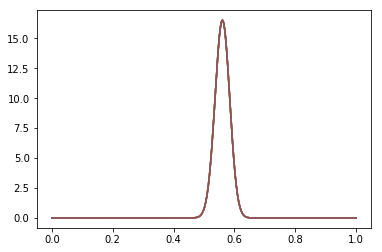

In [7]:
#I choose Wolf 
x=[0.01,0.02,0.03,0.04,0.05,0.10]#calculate the ratio within a certain range of the percentage who favored Wolf
for i, Range in enumerate(x):
    poll(421,236,Range)
    

Result:
within +/- 1.0 %: 0.3212598900246859
within +/- 2.0 %: 0.5926771066741
within +/- 3.0 %: 0.7863275788798723
within +/- 4.0 %: 0.9029141562616372
within +/- 5.0 %: 0.9620738696571001
within +/- 10.0 %: 0.9999700777736318


within +/- 1.7999999999999905 %: 0.5441490854780974


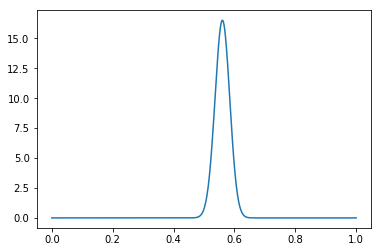

In [8]:
#test the final result:
x=0.578-0.56
poll(421,236,x)

In the final, Wolf received 57.8% which is within the +/-1.8% of the percentage who favored him. The probability I predicted within this range is 0.5441490854780974, and I think it is consistent with the poll result.